In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

os.chdir('../')
import BeyesLR


def x_to_phi(x, typ='linear', degree=3):
    if len(x.shape) == 1:
        x = x.reshape(-1, 1)

    if typ == 'linear':
        return np.concatenate([np.ones(x.shape[0]).reshape(-1, 1), x], axis=1)

    elif typ == 'poly':
        return np.concatenate([np.power(x, m) for m in range(degree + 1)], axis=1)


def poly(x, params):
    return np.array([p * np.power(x, i) for i, p in enumerate(params)]).sum(axis=0)



In [2]:
df = pd.read_csv('./example/advertising.csv')
x = df[['TV']].values
y = df['Sales'].values
x = (x - x.mean()) / x.std()

typ = 'poly'

phi = x_to_phi(x, typ=typ)
x_train, x_test, phi_train, phi_test, y_train, y_test = \
    train_test_split(x, phi, y, train_size=0.05, random_state=0)


Text(0, 0.5, 'Sales')

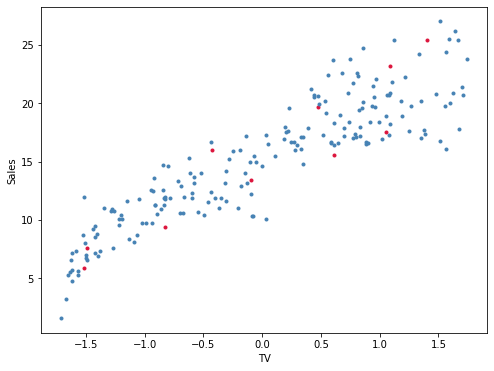

In [3]:
plt.figure(figsize=(8, 6))
x_axis = np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
plt.scatter(x_train, y_train, c='crimson', marker='.', label='trian')
plt.scatter(x_test, y_test, c='steelblue', marker='.', label='test')
plt.xlabel('TV')
plt.ylabel('Sales')


In [4]:
input_dim = phi.shape[1]
mu = np.zeros(input_dim)
S = np.identity(input_dim)
sigma = 1
beta = 1.0 / (sigma ** 2)


In [5]:
beyes_linear_model = BeyesLR.BeyesLinearRegression(mu, S, beta)


Text(0.5, 1.0, 'sampling from prior.')

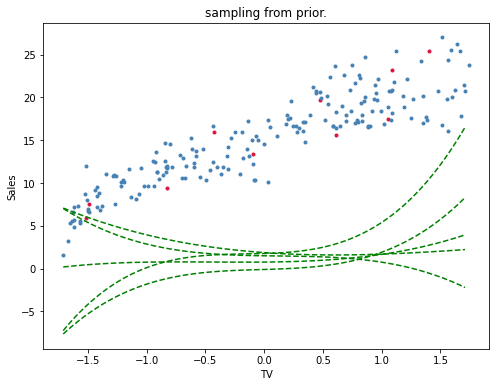

In [6]:
params = beyes_linear_model.sampling_params(n=5)
plt.figure(figsize=(8, 6))
x_axis = np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
lines = [poly(x_axis, param) for param in params]
plt.scatter(x_train, y_train, c='crimson', marker='.', label='trian')
plt.scatter(x_test, y_test, c='steelblue', marker='.', label='test')
for line in lines:
    plt.plot(x_axis, line, linestyle='dashed', color='green')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('sampling from prior.')


In [7]:
# Training
if True:
    beyes_linear_model.calc_posterior(phi_train, y_train)
else:
    for phi_sample, y_sample in zip(phi_train, y_train):
        beyes_linear_model.calc_posterior(phi_sample, y_sample)
print(beyes_linear_model.mu)
print(beyes_linear_model.S)


[12.09409689  2.56610691  2.30995195  1.97280931]
[[ 0.19552392 -0.01369792 -0.11326246 -0.00669253]
 [-0.01369792  0.4117119  -0.03608559 -0.21285263]
 [-0.11326246 -0.03608559  0.12998394  0.03940935]
 [-0.00669253 -0.21285263  0.03940935  0.14234882]]


Text(0.5, 1.0, 'sampling from posterior.')

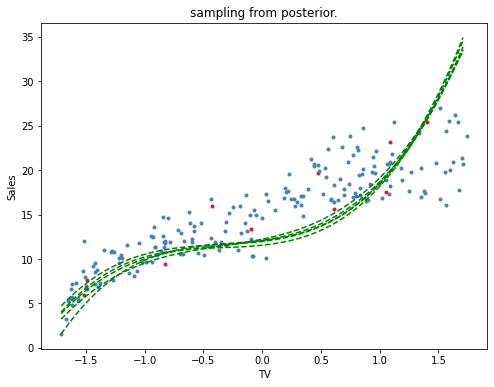

In [8]:
params = beyes_linear_model.sampling_params(n=5)
plt.figure(figsize=(8, 6))
x_axis = np.arange(x.min(), x.max(), (x.max() - x.min()) / 100)
lines = [poly(x_axis, param) for param in params]
plt.scatter(x_train, y_train, c='crimson', marker='.', label='trian')
plt.scatter(x_test, y_test, c='steelblue', marker='.', label='test')
for line in lines:
    plt.plot(x_axis, line, linestyle='dashed', color='green')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('sampling from posterior.')


In [9]:
pred_mu, pred_S = beyes_linear_model.predict(phi_test)


Text(0.5, 1.0, 'Predictive Distribition')

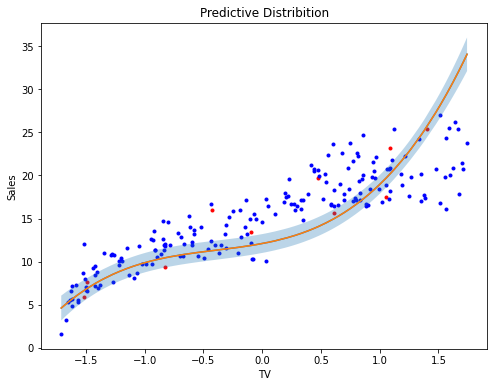

In [10]:
plt.figure(figsize=(8, 6))
plt.scatter(x_train, y_train, c='r', marker='.')
plt.scatter(x_test, y_test, c='b', marker='.')
_idx = np.argsort(np.squeeze(x_test))
plt.plot(x_test[_idx], pred_mu[_idx])
plt.plot(x_test[_idx], pred_mu[_idx])
plt.fill_between(
    np.squeeze(x_test[_idx]),
    pred_mu[_idx] - np.sqrt(pred_S[_idx]),
    pred_mu[_idx] + np.sqrt(pred_S[_idx]),
    alpha=0.3
)
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Predictive Distribition')
